In [1]:
import georasters as gr

import geopandas as gpd

from osgeo import osr, gdal

import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf

import pandas as pd

from rasterio.plot import show
from matplotlib.pyplot import gcf
import matplotlib.pyplot as plt

import seaborn as sns

# Elevation Map Values:

In [4]:
elevation_t = gr.from_file('Data/Elevation_AD.TIF')
elevation_df = elevation_t.to_pandas()

In [5]:
elevation_df

,row,col,value,x,y
0,0,2347,1.0,54.651806,24.700139
1,0,2348,0.0,54.652084,24.700139
2,0,2349,1.0,54.652361,24.700139
3,0,2350,1.0,54.652639,24.700139
4,0,2351,2.0,54.652917,24.700139
...,...,...,...,...,...
1789656,1757,2516,37.0,54.698750,24.212083
1789657,1757,2517,36.0,54.699028,24.212083
1789658,1757,2518,37.0,54.699306,24.212083
1789659,1757,2519,38.0,54.699584,24.212083


In [6]:
print(elevation_df.value.max())
print(elevation_df.value.min())

83.0
-89.0


In [7]:
d_table = pd.value_counts(elevation_df['value']).to_frame(name='Frequency')
d_table = d_table.reset_index()
d_table = d_table.rename(columns={'index': 'Value'})
d_table

,Value,Frequency
0,1.0,205379
1,2.0,195161
2,0.0,184253
3,3.0,170449
4,4.0,135639
...,...,...
140,-54.0,1
141,-50.0,1
142,83.0,1
143,-67.0,1


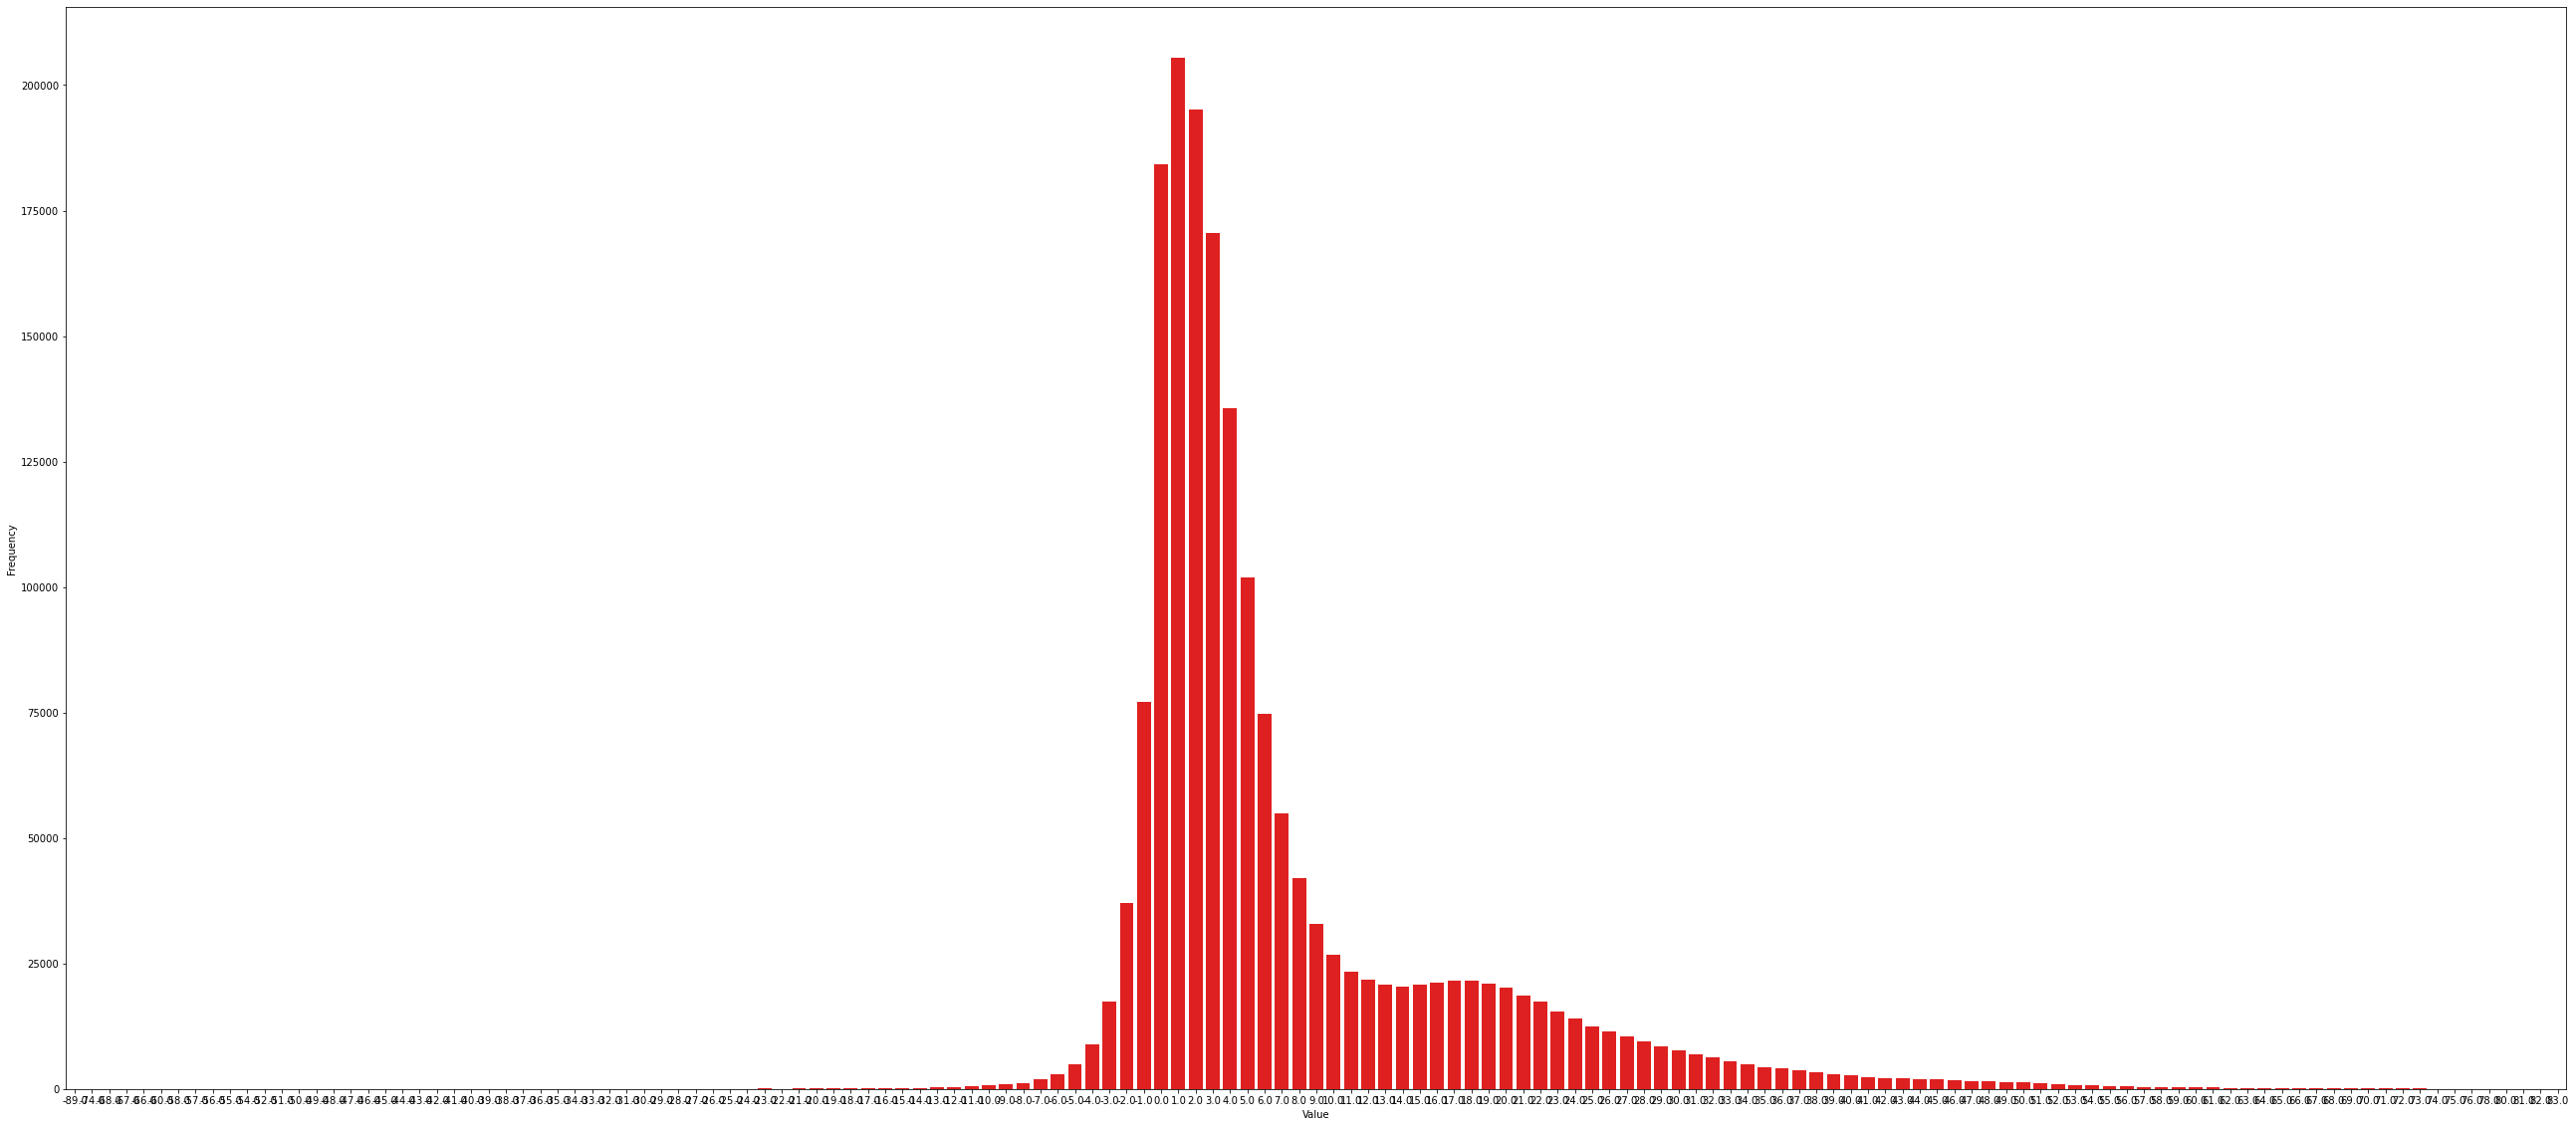

In [8]:
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(x="Value", y="Frequency", data=d_table, label="Distribution Table", ax=ax, color='red')

fig = plt.gcf()
fig.set_size_inches(45, 20)

# Clean the elevation data frame

In [9]:
elev_df_clean = elevation_df.copy()
# Get names of indexes for which column 'value' has value less than -10
indexNames = elev_df_clean[ elev_df_clean.value < -10 ].index
# Delete these row indexes from dataFrame
elev_df_clean.drop(indexNames , inplace=True)

In [10]:
type(elev_df_clean)

pandas.core.frame.DataFrame

In [11]:
indexNames

Int64Index([  38608,   38935,   38936,   39574,   39575,   39576,   39890,
              39891,   39892,   40206,
            ...
            1726224, 1726225, 1729647, 1729648, 1730620, 1731847, 1731848,
            1731851, 1731852, 1734051],
           dtype='int64', length=2895)

In [12]:
elev_df_clean

,row,col,value,x,y
0,0,2347,1.0,54.651806,24.700139
1,0,2348,0.0,54.652084,24.700139
2,0,2349,1.0,54.652361,24.700139
3,0,2350,1.0,54.652639,24.700139
4,0,2351,2.0,54.652917,24.700139
...,...,...,...,...,...
1789656,1757,2516,37.0,54.698750,24.212083
1789657,1757,2517,36.0,54.699028,24.212083
1789658,1757,2518,37.0,54.699306,24.212083
1789659,1757,2519,38.0,54.699584,24.212083


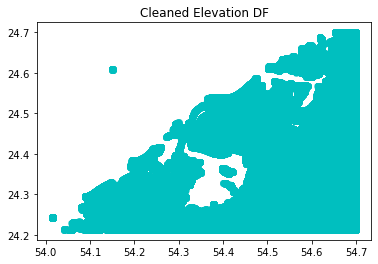

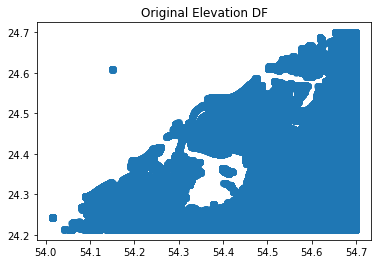

In [13]:
plt.scatter(elev_df_clean.x, elev_df_clean.y, alpha=0.5, color='c')
plt.title('Cleaned Elevation DF')
plt.show()
plt.scatter(elevation_df.x, elevation_df.y, alpha=0.5)
plt.title('Original Elevation DF')
plt.show()

# Seeing where points < -10 fall on map

 - Method 1:

In [15]:
elevation_df_new = pd.DataFrame()
for index, row in elevation_df.iterrows():
    d = elevation_df.iloc[index]
    if(d.value<-10):
        elevation_df_new = elevation_df_new.append(d, ignore_index=True)
print(len(elevation_df_new))

2895


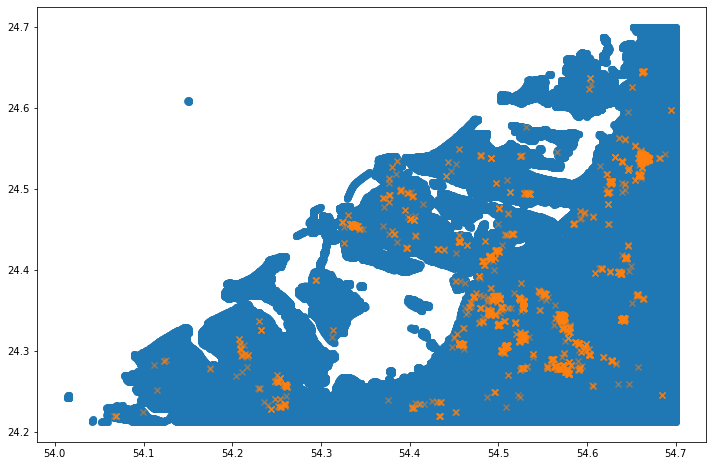

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(elevation_df.x, elevation_df.y, alpha=0.5)
plt.scatter(elevation_df_new.x, elevation_df_new.y, marker='x', alpha=0.5)

 - Method 2: because the first methods takes ages to compile

In [14]:
elevation_df_new_2 = pd.DataFrame()
elevation_df_new_2 = elevation_df_new_2.append(elevation_df[ elevation_df.value < -10 ])
elevation_df_new_2

,row,col,value,x,y
38608,196,2392,-11.0,54.664306,24.645694
38935,197,2391,-12.0,54.664028,24.645416
38936,197,2392,-12.0,54.664306,24.645416
39574,199,2385,-15.0,54.662361,24.644861
39575,199,2386,-18.0,54.662639,24.644861
...,...,...,...,...,...
1731847,1731,1559,-11.0,54.432917,24.219305
1731848,1731,1560,-11.0,54.433195,24.219305
1731851,1731,1563,-15.0,54.434028,24.219305
1731852,1731,1564,-13.0,54.434306,24.219305


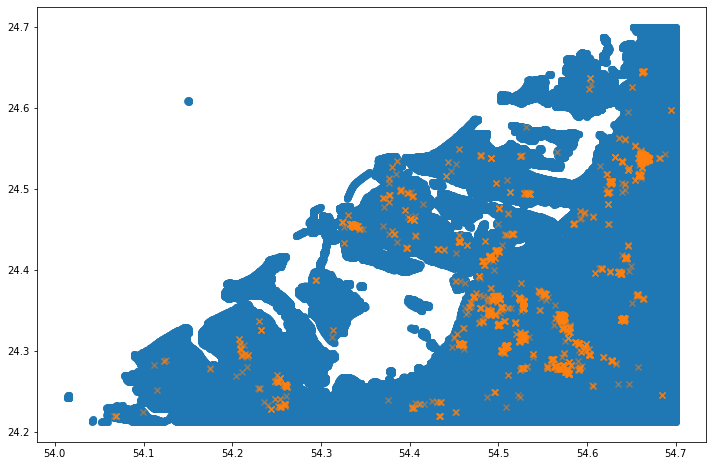

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(elevation_df.x, elevation_df.y, alpha=0.5)
plt.scatter(elevation_df_new_2.x, elevation_df_new_2.y, marker='x', alpha=0.5)

# Save the clean data frame:

In [111]:
elev_df_clean.to_pickle("Data/clean_elevation.pkl")

In [16]:
test_df = pd.read_pickle("Data/clean_elevation.pkl")

In [17]:
test_df

,row,col,value,x,y
0,0,2347,1.0,54.651806,24.700139
1,0,2348,0.0,54.652084,24.700139
2,0,2349,1.0,54.652361,24.700139
3,0,2350,1.0,54.652639,24.700139
4,0,2351,2.0,54.652917,24.700139
...,...,...,...,...,...
1789656,1757,2516,37.0,54.698750,24.212083
1789657,1757,2517,36.0,54.699028,24.212083
1789658,1757,2518,37.0,54.699306,24.212083
1789659,1757,2519,38.0,54.699584,24.212083


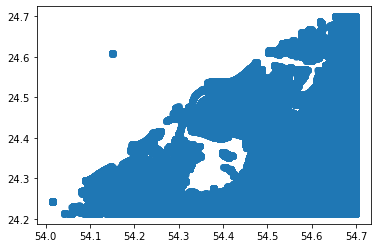

In [115]:
plt.scatter(test_df.x, test_df.y, alpha=0.5)

In [18]:
type(test_df)

pandas.core.frame.DataFrame

In [19]:
type(elevation_df)

pandas.core.frame.DataFrame